# Influence of different parameters on our DQN


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
import re
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
repeat = 3
LL_data = {}
RUN_PREFIX = 'LOG.run.'
envs = ['LunarLander-v2']
configs = ['LL_100-100-100', 'LL_150-100-50']
for env in envs:
    LL_data[env] = {}
    for config in configs:
        LL_data[env][config] = {}
        root_dir = os.path.join('..', env, config)
        log_files = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.startswith(RUN_PREFIX)]
        get_run_number = re.compile(r'\d(?=.stats.json)')
        for log_file in log_files:
            with open(log_file) as f:
                run_number = get_run_number.findall(os.path.basename(log_file))[0]
                LL_data[env][config][run_number] = json.load(f)
                
print(LL_data.keys())
print(LL_data['LunarLander-v2'].keys())

dict_keys(['LunarLander-v2'])
dict_keys(['LL_100-100-100', 'LL_150-100-50'])


[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


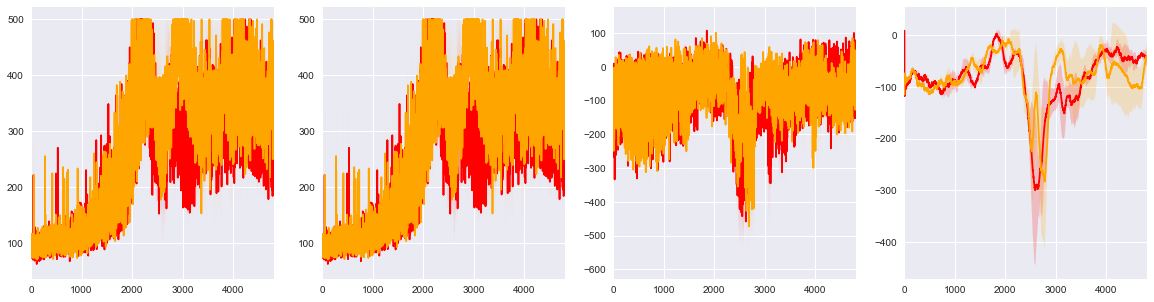

In [7]:
def get_data_as_np(data):
    lens = [np.array(data[run]['episode_lengths'])
               for run in data.keys()]
    maxlen = min(len(item) for item in lens)
    lens = [item[:maxlen] for item in lens]
    lens = np.vstack(lens)

    mean_lens = [np.array(data[run]['mean_episode_lengths'])
               for run in data.keys()]
    maxlen = min(len(item) for item in mean_lens)
    mean_lens = [item[:maxlen] for item in mean_lens]
    mean_lens = np.vstack(lens)

    rews = [np.array(data[run]['episode_rewards'])
               for run in data.keys()]
    maxlen = min(len(item) for item in rews)
    rews = [item[:maxlen] for item in rews]
    rews = np.vstack(rews)

    mean_rews = [np.array(data[run]['mean_episode_rewards'])
               for run in data.keys()]
    maxlen = min(len(item) for item in mean_rews)
    mean_rews = [item[:maxlen] for item in mean_rews]
    mean_rews = np.vstack(mean_rews)
    
    return lens, mean_lens, rews, mean_rews


f, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axes = [axes]

colors=['red', 'orange', 'magenta', 'blue', 'purple', 'cyan', 'green', 'yellow']


for i, env in enumerate(envs):
    for j, config in enumerate(configs):
        results = get_data_as_np(LL_data[env][config])
        print(results[0] == results[1])
        for k, res in enumerate(results):
            sns.tsplot(data=res, color=colors[j], ax=axes[0][k])
            #sns.tsplot(data=res, color=colors[j], ax=axes[int(k/2)][k%2])
plt.show()